In [53]:
import linsolve
import tf_linsolve
import scipy
import numpy as np
import pylab as plt
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [69]:
x = np.linspace(0, 2 * np.pi, 1000)
g = np.cos(x) + 1j * np.sin(x)
h = np.sin(x) + 1j * np.cos(x)
i = x + 1j * x
data = {'g + h': g + h, 'g + i': g + i, 'i + h': i + h, 'i + g + h': i + g + h}
wgts = {k: np.random.uniform(0.9, 1.1, v.shape[0]) for k, v in data.items()}

In [70]:
ls = linsolve.LinearSolver(data)
tfls = tf_linsolve.LinearSolver(data)

In [71]:
%time solution = ls.solve()

CPU times: user 739 µs, sys: 223 µs, total: 962 µs
Wall time: 833 µs


In [72]:
%time sol = tfls.solve()

CPU times: user 3.25 ms, sys: 1.49 ms, total: 4.74 ms
Wall time: 3.36 ms


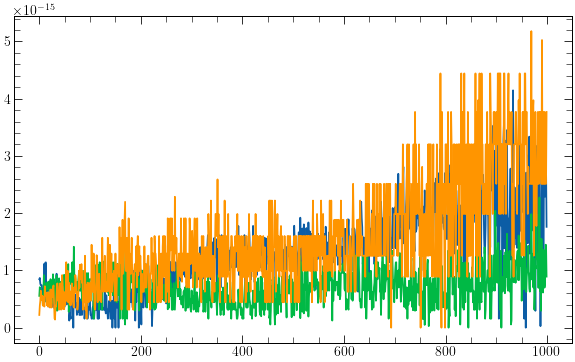

In [73]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Least-Squares Case

In [74]:
ls = linsolve.LinearSolver(data, wgts=wgts)
tfls = tf_linsolve.LinearSolver(data, wgts=wgts)

In [75]:
%time solution = ls.solve(mode='lsqr')

CPU times: user 42 ms, sys: 6.1 ms, total: 48.1 ms
Wall time: 43.7 ms


In [76]:
%time sol = tfls.solve(mode='lsqr', rcond=0)

CPU times: user 4.97 ms, sys: 2.27 ms, total: 7.24 ms
Wall time: 4.97 ms


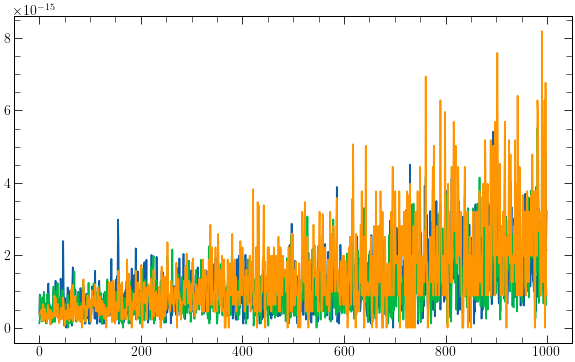

In [77]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Psuedo-inverse

In [78]:
%time solution = ls.solve()

CPU times: user 8.46 ms, sys: 1.85 ms, total: 10.3 ms
Wall time: 9.25 ms


In [79]:
%time sol = tfls.solve()

CPU times: user 16 ms, sys: 2.67 ms, total: 18.7 ms
Wall time: 7.39 ms


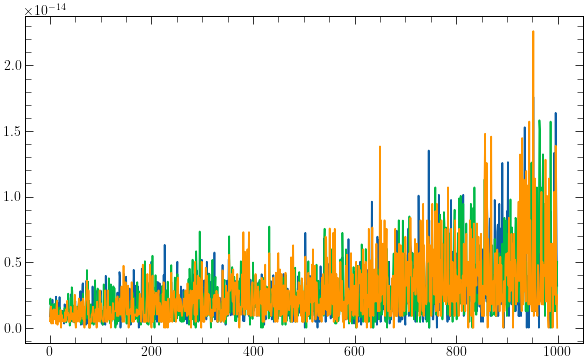

In [80]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Solve

In [81]:
%time solution = ls.solve(mode='solve')

CPU times: user 7.78 ms, sys: 1.5 ms, total: 9.28 ms
Wall time: 8.11 ms


In [82]:
%time sol = tfls.solve(mode='solve')

CPU times: user 5.24 ms, sys: 1.66 ms, total: 6.9 ms
Wall time: 4.87 ms


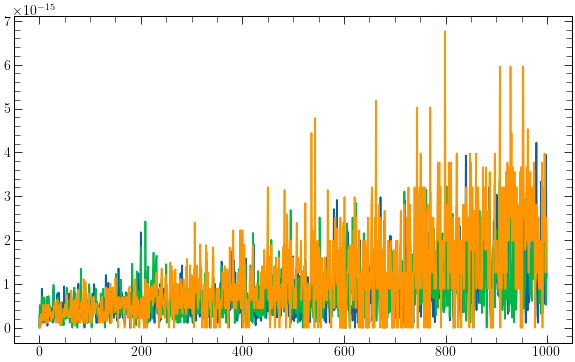

In [83]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()